## Assignment 6 solution - Done by ML students Ivan Kabadzhov, Horia Turcuman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import utils
from sklearn import metrics
import csv

In [2]:
def lib_minibatch_gradient(X,y,lr, N_b=10):
        
    X = X.copy()
    y = y.copy()
    
    i=0
    n=0
    clf = linear_model.SGDRegressor(max_iter = 1000, tol=1e-10,verbose=0,alpha=0,eta0=lr)

    #print(clf)

    J_omegas = []
    ns =[]

    X_sub = np.array_split(X,N_b)
    y_sub = np.array_split(y,N_b)
       
    while(1):
        clf.partial_fit(X_sub[i],y_sub[i])
        y_eval = clf.predict(X)
        n=n+(X.shape[0]/N_b) 
        J_omega =X.shape[0]*metrics.mean_squared_error(y_eval,y)
        J_omegas.append(J_omega)
        ns.append(n)
        i=i+1
        if (i>=len(X_sub)):
            X, y = utils.shuffle(X, y)
            X_sub = np.array_split(X,N_b)
            y_sub = np.array_split(y,N_b)
            i=0
        if n>=1000:
            break

    return J_omegas, ns

In [3]:
def man_minibatch_gradient(X,y,lr, N_b=10):

    X = X.copy()
    y = y.copy()
        
    #N_b = 10  # needs to divide the training set size without remainder
    
    i=0
    n=0

    J_omegas = []
    ns =[]

    X_sub = np.array_split(X,N_b)
    y_sub = np.array_split(y,N_b)

    w = np.zeros(X.shape[1] + 1)
       
    while(1):

        X_train = np.c_[np.ones(len(X_sub[i])), X_sub[i]]

        # this should be a +, not -
        # there are some additional work done in the library,
        # which is substituted by change of factor
        for j in range(len(X_train)):
            old_w = w
            w = w + lr * 0.25 * (y_sub[i][j] - np.dot(w, X_train[j])) * X_train[j]

        y_eval = w[0] + np.dot(X, w[1:])

        n=n+(X.shape[0]/N_b) 
        J_omega = X.shape[0] * np.average((y_eval - y) ** 2, axis=0)
        J_omegas.append(J_omega)
        ns.append(n)
        i=i+1
        if (i>=len(X_sub)):
            X, y = utils.shuffle(X, y)
            X_sub = np.array_split(X,N_b)
            y_sub = np.array_split(y,N_b)
            i=0
        if n>=1000:
            break
            
    return J_omegas, ns

In [4]:
read1 = csv.reader(open("ENB2012_data.csv", "r"))
data = np.array([row for row in read1])

X = data[1:,:8].astype(float)
y = data[1:,8].astype(float)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

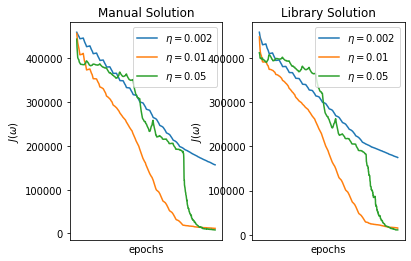

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # to show both versions
plt.title("Minibatch Gradient")

ax1.set_title("Manual Solution")
errors, ns = man_minibatch_gradient(X, y,0.002, len(X))
ax1.plot(ns,errors, label="$\eta=0.002$")
errors, ns = man_minibatch_gradient(X, y,0.01, len(X))
ax1.plot(ns,errors, label="$\eta=0.01$")
errors, ns = man_minibatch_gradient(X, y,0.05, len(X))
ax1.plot(ns,errors, label="$\eta=0.05$")
ax1.set_xlabel("epochs"); ax1.set_ylabel("$J(\omega)$")
ax1.set_xticks(ticks=[])
ax1.legend()

ax2.set_title("Library Solution")
errors, ns = lib_minibatch_gradient(X, y,0.002, len(X))
ax2.plot(ns,errors, label="$\eta=0.002$")
errors, ns = lib_minibatch_gradient(X, y,0.01, len(X))
ax2.plot(ns,errors, label="$\eta=0.01$")
errors, ns = lib_minibatch_gradient(X, y,0.05, len(X))
ax2.plot(ns,errors, label="$\eta=0.05$")
ax2.set_xlabel("epochs"); ax2.set_ylabel("$J(\omega)$")
ax2.set_xticks(ticks=[])
ax2.legend()

plt.show()

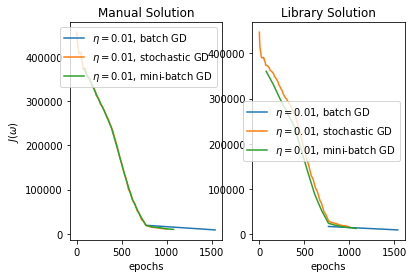

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # to show both versions
plt.title("Minibatch Gradient")

ax1.set_title("Manual Solution")
errors, ns = man_minibatch_gradient(X, y,0.01, 1)
ax1.plot(ns,errors, label="$\eta=0.01$, batch GD")
errors, ns = man_minibatch_gradient(X, y,0.01, len(X))
ax1.plot(ns,errors, label="$\eta=0.01$, stochastic GD")
errors, ns = man_minibatch_gradient(X, y,0.01)
ax1.plot(ns,errors, label="$\eta=0.01$, mini-batch GD")
ax1.set_xlabel("epochs"); ax1.set_ylabel("$J(\omega)$")
ax1.legend()

ax2.set_title("Library Solution")
errors, ns = lib_minibatch_gradient(X, y,0.01, 1)
ax2.plot(ns,errors, label="$\eta=0.01$, batch GD")
errors, ns = lib_minibatch_gradient(X, y,0.01, len(X))
ax2.plot(ns,errors, label="$\eta=0.01$, stochastic GD")
errors, ns = lib_minibatch_gradient(X, y,0.01)
ax2.plot(ns,errors, label="$\eta=0.01$, mini-batch GD")
ax2.set_xlabel("epochs"); ax1.set_ylabel("$J(\omega)$")
ax2.legend()

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=23cff99d-5c99-4e3f-a44e-4cec7634860e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>